# Selecting Data Phase

sample graphs of outlier removal

before


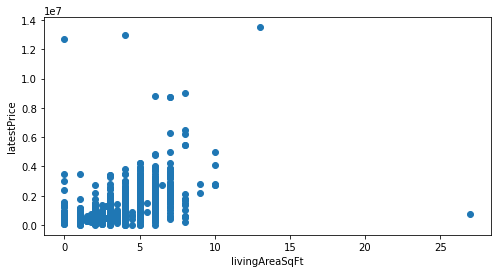

after


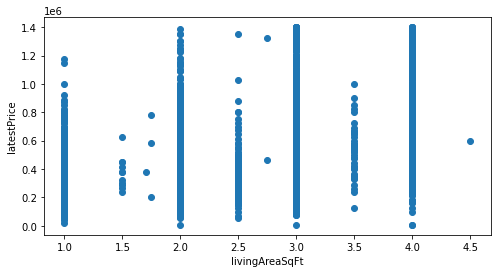

In [19]:
import numpy as np
import operator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats

def min_max_normalization(x) :
    x_min = min(x)
    x_max = max(x)
    x = [(a - x_min)/(x_max - x_min) for a in x]
    return x

#Independent variables: numOfBathrooms, avgSchoolRating, numOfBedrooms, numOfHighSchools, and MedianStudentsPerTeacher
#Dependent varaibles: lateestPrice

df = pd.read_csv('austinHousingData.csv')
df_filtered = df[['numOfBathrooms', 'avgSchoolRating', 'numOfBedrooms', 'numOfHighSchools', 'MedianStudentsPerTeacher', 'latestPrice']]

z = np.abs(stats.zscore(df_filtered))
threshold = 2
df_filtered_o = df_filtered[(z < threshold).all(axis=1)]

X = df_filtered_o[['numOfBathrooms', 'avgSchoolRating', 'numOfBedrooms', 'numOfHighSchools', 'MedianStudentsPerTeacher']]
y = df_filtered_o.latestPrice
y = y.to_numpy()

print('sample graphs of outlier removal\n')

print('before')
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df_filtered['numOfBathrooms'], df_filtered['latestPrice'])
ax.set_xlabel('livingAreaSqFt')
ax.set_ylabel('latestPrice')
plt.show()
print('after')
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df_filtered_o['numOfBathrooms'], df_filtered_o['latestPrice'])
ax.set_xlabel('livingAreaSqFt')
ax.set_ylabel('latestPrice')
plt.show()

# Training/Modeling Phase

In [20]:
for i in range(2,11):
    y = min_max_normalization(y)
    degree = i
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    tSize = int(len(df)*0.1)
    X_poly_train, X_poly_test, y_train, y_test = X_poly[:-tSize], X_poly[-tSize:], y[:-tSize], y[-tSize:]
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    mse_train = mean_squared_error(y_train,y_train_pred)
    mse_test = mean_squared_error(y_test,y_test_pred)
    print("Training MSE for degree", degree, "=", mse_train)
    print("Testing MSE for degree", degree, "=", mse_test, "\n")

Training MSE for degree 2 = 0.01262175920747523
Testing MSE for degree 2 = 0.043851127546815305 

Training MSE for degree 3 = 0.012323078318747627
Testing MSE for degree 3 = 0.041784576406933685 

Training MSE for degree 4 = 0.011856470116198038
Testing MSE for degree 4 = 0.0406636209291548 

Training MSE for degree 5 = 0.011490324809478304
Testing MSE for degree 5 = 0.03810119448429927 

Training MSE for degree 6 = 0.010995613206455824
Testing MSE for degree 6 = 0.04360148524184442 

Training MSE for degree 7 = 0.010558033163475273
Testing MSE for degree 7 = 0.15614119685834202 

Training MSE for degree 8 = 0.01006896059452177
Testing MSE for degree 8 = 1603.3155413943573 

Training MSE for degree 9 = 0.009843878366122554
Testing MSE for degree 9 = 55158.252338896935 

Training MSE for degree 10 = 0.010200338215181879
Testing MSE for degree 10 = 28908.896104443662 

